# Linear regression

### Created by Dawid Lisek

Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Use the head and describe function to examine the data and display few columns.

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Plot and analyze the data, where: x - population, y - profit.

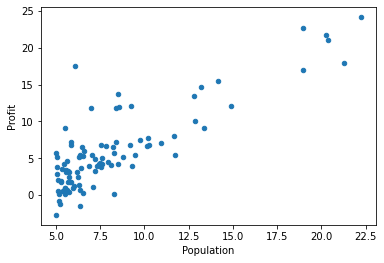

In [5]:
data.plot.scatter(x='Population', y='Profit')
plt.show()

In order to make this cost function work (intercept value theta has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.

In [6]:
data.insert(0, 'ones', [1 for x in range(len(data['Population']))])

In [7]:
data

,ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2). Check with the head function if your implementation is correct:

In [8]:
X = data[['ones', 'Population']]
y = data['Profit']

In [9]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.array([0,0])

In [10]:
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [11]:
y

matrix([[17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
          4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
          3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
          3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
          3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
         -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
          4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
          5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
          8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
          1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
          5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
          5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
          1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
          6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
          5.3436 ,  4.2415 ,  6.79

The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

In [12]:
def computeCost(X, y, theta):
    m = len(X)
    h_theta = theta @ X.T
    cost = (np.power(h_theta - y, 2)/(2*m)).sum()
    return cost

Test the cost function with (θ=0).

In [13]:
computeCost(X, y, theta)

32.072733877455676

Implement the gradient descent algorithm: the function returns optimized values θ and a vector of the cost function value for each iteration

In [14]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    theta = list(theta)
    for _ in range(it):
        m = len(X)
        h_theta = theta @ X.T
        for i in range(X.shape[1]):
            theta[i] = theta[i] - alpha * np.sum(((h_theta - y)/m) * X[:, i])
        cost.append(computeCost(X, y, theta))
    return np.array(theta), cost

In [15]:
alpha = 0.01
it = 1000
theta, cost = simple_gradient(X, y, theta, alpha, it)

Calculate the optimal parameters for the dataset.

In [16]:
theta

array([-3.24140214,  1.1272942 ])

Calculate the cost function for the given θ.

In [17]:
cost[-1]

4.515955503078913

Plot the regression function and our dataset.

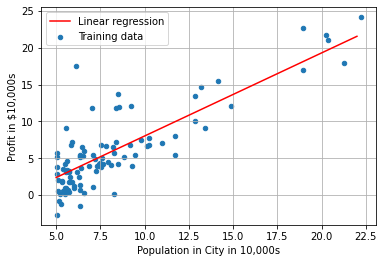

In [18]:
data.plot.scatter(x='Population', y='Profit')
plt.plot(np.arange(start=5, stop=22.5, step=0.5), theta[0] + theta[1] * np.arange(start=5, stop=22.5, step=0.5), 'r')
plt.legend(['Linear regression', 'Training data'])
plt.xlabel('Population in City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.show()

Plot the relationship between the cost function and number of iterations.

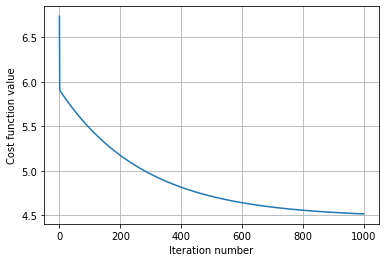

In [19]:
plt.figure()
plt.plot(np.arange(1000), cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.grid()
plt.show()

### Linear regression with multiple variables

In [22]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [23]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Normalization:

In [24]:
for col in data2:
    data2[col] = (data2[col] - data2[col].mean()) / data2[col].std()

In [25]:
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In order to make this cost function work (intercept value θ has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.

In [26]:
data2.insert(0, 'ones', [1 for x in range(len(data2))])
data2.head()

,ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2)

In [27]:
X = data2[['ones', 'Size', 'Bedrooms']]
y = data2['Price']

In [28]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.array([0, 0, 0])

In [30]:
computeCost(X, y, theta)

0.48936170212765967

In [31]:
alpha = 0.01
it = 1000
theta, cost = simple_gradient(X, y, theta, alpha, it)

Calculate the optimal parameters for the dataset.

In [32]:
theta

array([-1.11100365e-16,  8.78503652e-01, -4.69166570e-02])

Calculate the cost function for the given θ.

In [33]:
cost[-1]

0.13070336960771894

Plot the regression function and our dataset.

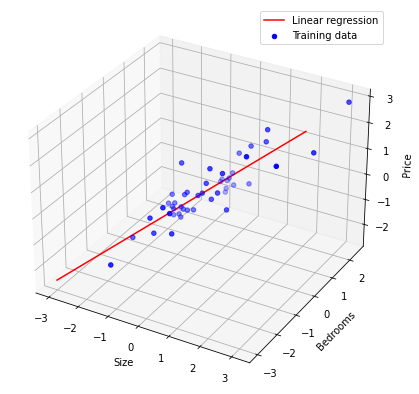

In [34]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ='3d')  
ax.scatter3D(data2['Size'], data2['Bedrooms'], data2['Price'], color='blue')
ax.plot(np.arange(start=-3, stop=3), np.arange(start=-3, stop=3), theta[0] + theta[1] * np.arange(start=-3, stop=3) + theta[2] * np.arange(start=-3, stop=3), 'r')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.legend(['Linear regression', 'Training data'])
plt.show()

### Linear regression - Python packages

In [35]:
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Divide the database into training and testing.

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(boston_X, boston_Y, test_size = 0.3)

According to the above example, please implement linear regression model for the dataset. Please calculate the statistical metrics for the model including MSE and R2?

In [38]:
regr = linm.LinearRegression()
reg = regr.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

In [39]:
reg.coef_

array([-9.14525344e-02,  5.71190151e-02,  7.90355891e-02,  2.63269929e+00,
       -2.14508940e+01,  3.73210810e+00,  3.24299042e-03, -1.46915449e+00,
        2.94169039e-01, -1.39955467e-02, -9.93066618e-01,  6.56771203e-03,
       -4.88766628e-01])

In [41]:
print(f'Błąd średniokwadratowy: {mean_squared_error(Y_test, y_pred)}')
print(f'R2 score: {r2_score(Y_test, y_pred)}')

Błąd średniokwadratowy: 19.904812883671777
R2 score: 0.7589166925229031


Plot the linear regression for each atribute in the Boston dataset. Iterative or using subplots.

IndexError: index 13 is out of bounds for axis 1 with size 13

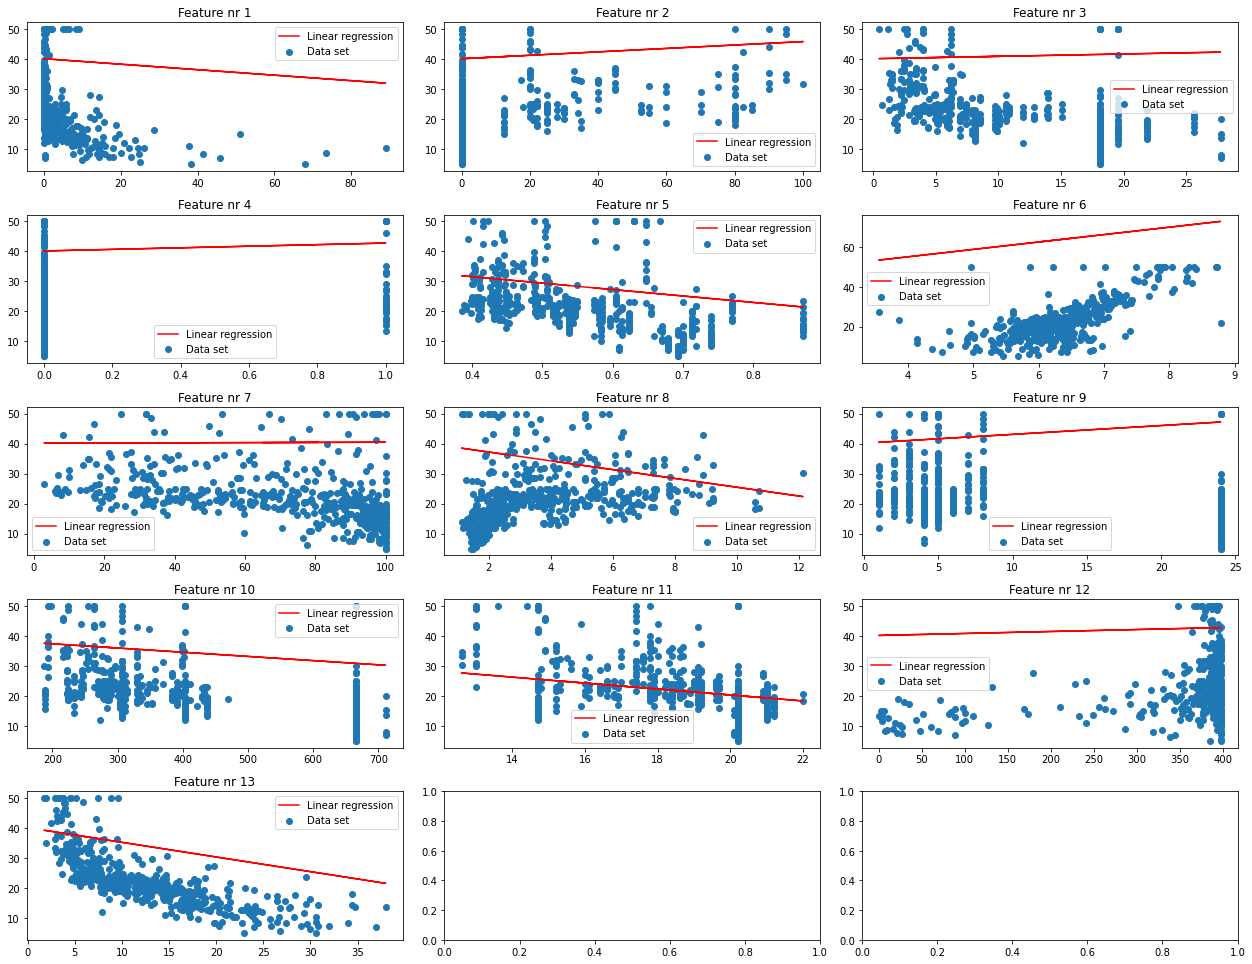

In [42]:
plt.rcParams["figure.figsize"] = [17.50, 13.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(nrows=5, ncols=3)
for i, ax in enumerate(axes.flat):
    ax.scatter(boston.data[:,i], boston.target)
    ax.plot(boston.data[:,i], boston.data[:,i] * regr.coef_[i] + regr.intercept_, 'r')
    ax.set_title(f'Feature nr {i + 1}')
    ax.legend(['Linear regression', 'Data set'])

Additionally Compare the linear regression models (Linear Regression, Lasso, Ridge, ElasticNet) based on the mean error rate.

In [43]:
MSE = []
reg_LinReg =linm.LinearRegression().fit(X_train, Y_train)
y_pred = reg_LinReg.predict(X_test)
MSE.append(mean_squared_error(Y_test, y_pred))
reg_Ridge = linm.Ridge(alpha = .5).fit(X_train, Y_train)
y_pred = reg_Ridge.predict(X_test)
MSE.append(mean_squared_error(Y_test, y_pred))
reg_Lasso = linm.Lasso(alpha = 5.1).fit(X_train, Y_train)
y_pred = reg_Lasso.predict(X_test)
MSE.append(mean_squared_error(Y_test, y_pred))
reg_ElNet = linm.ElasticNet(alpha = .5, l1_ratio=0.5).fit(X_train, Y_train)
y_pred = reg_ElNet.predict(X_test)
MSE.append(mean_squared_error(Y_test, y_pred))

c:\Users\dawid\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


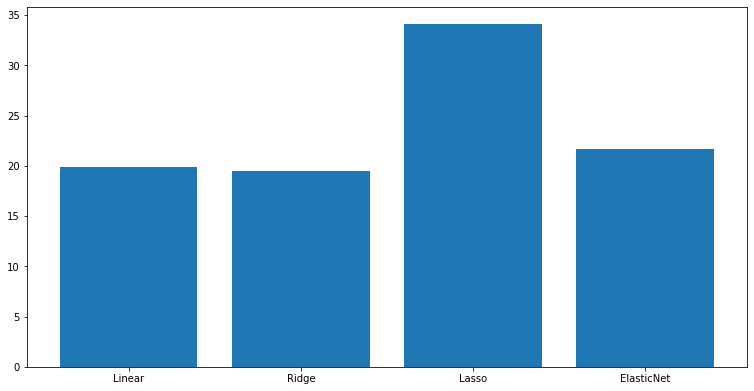

In [44]:
regressions = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(regressions, MSE)
plt.show()